In [1]:
# Declaration: a hash map is declared like any other variable. The syntax is {}
hash_map = {}

# If you want to initialize it with some key value pairs, use the following syntax:
hash_map = {1: 2, 5: 3, 7: 2}

# Checking if a key exists: simply use the `in` keyword
1 in hash_map # True
9 in hash_map # False

# Accessing a value given a key: use square brackets, similar to an array.
hash_map[5] # 3

# Adding or updating a key: use square brackets, similar to an array.
# If the key already exists, the value will be updated
hash_map[5] = 6

# If the key doesn't exist yet, the key value pair will be inserted
hash_map[9] = 15

# Deleting a key: use the del keyword. Key must exist or you will get an error.
del hash_map[9]

# Get size
len(hash_map) # 3

# Get keys: use .keys(). You can iterate over this using a for loop.
keys = hash_map.keys()
for key in keys:
    print(key)

# Get values: use .values(). You can iterate over this using a for loop.
values = hash_map.values()
for val in values:
    print(val)

1
5
7
2
6
2


In [2]:
{k:v for k, v in hash_map.items()}

{1: 2, 5: 6, 7: 2}

In [3]:
{val ** 2 for val in hash_map.values()}

{4, 36}

In [4]:
{sum(values) for val in hash_map.values()}

{10}

## Example 1: 1. Two Sum

> Given an array of integers `nums` and an integer `target`, return indices of two numbers such that they add up to `target`. You cannot use the same index twice.

The brute force solution would be to use a nested for loop to iterate over every pair of indices and check if the sum is equal to `target`. This will result in a time complexity of $O(n^2)$. In the brute force solution, the first for loop focuses on a number `num` and does a second for loop which looks for `target - num` in the array. With an array, looking for `target` - num is $O(n)$, but with a hash map, it is $O(1)$.

We can build a hash map as we iterate along the array, mapping each value to it's index. At each index `i`, where `num = nums[i]`, we can check our hash map for `target - num`. Adding key-value pairs and checking for `target - num` are all $O(1)$, so our time complexity will improve to $O(n)$.



In [5]:
nums = [5, 2, 7, 10, 3, 9]
target = 8

def twoSum(nums, target):
    dic = {}
    for i in range(len(nums)):
        num = nums[i]
        complement = target - num
        if complement in dic: # This operation is O(1)!
            return [i, dic[complement]]

        dic[num] = i

    return dic #[-1, -1]

print(twoSum(nums, target))

[4, 0]


### ✅ Using .get() in twoSum
in this problem you are using the formula `nums[i] + complement = target` thus `target - nums[i] = complement`

A more **'Pythonic'** is to write it this way:

In [6]:
def twoSum(nums, target):
    dic = {}
    for i, num in enumerate(nums):
        complement = target - num # here we are getting the number to look for
        index = dic.get(complement)
        if index is not None:
            return [i, index]
        dic[num] = i
    return dic#[-1, -1]

print(twoSum(nums, target))

[4, 0]


## 🔍 What Is dict.get() in Python?
`dict.get(key, default_value)` is a safe way to access a value from a dictionary without raising an error if the key doesn't exist.

### ✅ Basic Example

In [7]:
prices = {"apple": 1.5, "banana": 0.99}

# Works fine
print(prices.get("apple"))        # → 1.5

# Key doesn't exist, so get() returns None
print(prices.get("orange"))       # → None

# With a default value
print(prices.get("orange", 0))    # → 0


1.5
None
0


### 💡 Use Cases
1. ✅ Avoiding KeyErrors

In [8]:
# Without get()
# print(prices["orange"])  # ❌ KeyError

# With get()
print(prices.get("orange"))  # ✅ None


None


### 2. ✅ Setting a Default Value

In [9]:
name_ages = {"Chris": 30, "Mike": 25}

print(name_ages.get("Lena", 20))  # → 20 (uses default)
print(name_ages.get("Chris", 20)) # → 30 (ignores default)


20
30


## It's important to know how to build a dictionary from `nums` in the first place, so let do that

In [10]:
nums = [5, 2, 7, 10, 3, 9]
target = 8

dict = {}
for i, num in enumerate(nums):
    dict[num] = i # key=num val=idx
print(dict)




{5: 0, 2: 1, 7: 2, 10: 3, 3: 4, 9: 5}


### 🧠 Bonus: .get() Is Readable
Instead of this:

In [11]:
if "banana" in prices:
    price = prices["banana"]
else:
    price = 0


You just write:

In [14]:
price = prices.get("banana", 0)
print(price)


0.99


## Example 2: 2351. First Letter to Appear Twice

Given a string `s`, return the first character to appear twice. It is guaranteed that the input will have a duplicate character.

In [15]:
s = "abcdeda"


def repeatedCharacter(s):
    seen = set()
    for c in s:
        if c in seen:
            return c
        seen.add(c)

    return seen

print(repeatedCharacter(s))

d


## Check if the Sentence Is Pangram
A pangram is a `sentence` where every letter of the English alphabet appears at least once.

Given a string `sentence` containing only lowercase English letters, return `true` if `sentence` is a pangram, or `false` otherwise.

```python
Input: sentence = "thequickbrownfoxjumpsoverthelazydog"
Output: true
Explanation: sentence contains at least one of every letter of the English alphabet.
```

```python
Input: sentence = "leetcode"
Output: false
```

In [16]:
# we know that id the len(set) == 27 we must have a Panagram
s = ("thequickbrownfoxjumpsoverthelazydog")
def panagram(s):
    seen = set()
    for letter in s:
        seen.add(letter)
    if len(seen) == 26:
        return True
    return False
print(panagram(s))


True


## Missing Number
Given an array `nums` containing `n` distinct numbers in the range `[0, n]`, return the only number in the range that is missing from the array.

 **Example 1:**
 ```python
Input: nums = [3,0,1]

Output: 2


```
**Explanation:**
`n = 3` since there are 3 numbers, so all numbers are in the range `[0,3]`. 2 is the missing number in the range since it does not appear in `nums`.


In [16]:
nums = [3,0,1]

def missingNumber(nums):
        full = set(range(len(nums) + 1))
        return (full - set(nums)).pop()

missingNumber(nums)

2

### 🧠 Why .pop()?
Because set subtraction returns a set, even if it contains just one value. `.pop()` pulls out that single number.

### Example Walkthrough
Input:

In [14]:
nums = [3, 0, 1]


* `len(nums) = 3`

* full = `set(range(4))` = `{0, 1, 2, 3}`

* `set(nums)` = `{0, 1, 3}`

* Difference = `{2}`
* `.pop()` gets `2`

Alright bet — the math trick for the “Missing Number” problem is a classic interview move. Let’s go over it:

### 🔢 The Math Trick (Sum Formula)
If there are n numbers from 0 to n, their sum should be:

$expected\_sum = \frac{n(n+1)}{2}$


If you subtract the actual sum of the list from the expected sum, you get the missing number.

### ✅ Final Code (Math Version)

In [1]:
nums = [0, 1, 2, 3, 5]  # missing number is 2


def missingNumber(nums):
    n = len(nums)
    expected_sum = n * (n + 1) // 2
    actual_sum = sum(nums)
    return expected_sum - actual_sum

missingNumber(nums)


4

## Counting
Counting is a very common pattern with hash maps. By "counting", we are referring to **tracking the frequency** of things. This means our hash map will be **<u>mapping keys to integers</u>**. <span style="background-color: yellow">Anytime you need to count anything, think about using a **hash map** to do it</span>.

Recall that when we were looking at sliding windows, some problems had <span style="background-color: orange">their **constraint** as *limiting the amount* of a certain element in the window</span>. For example, longest substring with at most `k` `0s`. In those problems, we could simply use an integer variable `curr` because we are only focused on one element (we only cared about 0). A hash map opens the door to solving problems where the constraint involves multiple elements. Let's start by looking at a sliding window example that leverages a hash map.

> **Example 1**: You are given a string `s` and an integer `k`. Find the length of the longest substring that contains at most `k` distinct characters.
For example, given `s = "eceba"` and `k = 2`, return `3`. The longest substring with at most `2` distinct characters is `"ece"`.

This problem deals with substrings and has a constraint on the substrings (at most `k` distinct characters). These characteristics let us know that we should consider sliding window. *Remember, the idea of a sliding window is to add elements by sliding to the right* until the **window violates the constraint**. Once it does, we shrink the window from the left until it no longer violates the constraint. In this problem, we are concerned with the number of distinct characters in the window. The brute force way to check for this constraint would be to check the entire window every time, which could take $O(n)$ time. Using a hash map, we can check the constraint in $O(1)$.

Let's use a hash map `counts` to keep count of the characters in the window. This means we will *map letters to their frequency* (letter:frequency-->k:v). The length (number of keys) in `counts` at any time is the number of distinct characters. When we remove from the left, we can decrement the frequency of the elements being removed. <span style="background-color: orange">When the frequency becomes `0`, we know this character is no longer part of the window, and we can delete the key</span>.

> ### First — What’s a Sliding Window?
“Add elements by sliding to the right until the window violates the constraint. Once it does, shrink from the left until it no longer violates the constraint.”

👀 Think of this like a glass window you slide open on a hot day.
You keep extending the window to the right (adding letters to the substring) — like letting in air — until you hit a problem (💥 too many different letters).
Once that happens, you slide the left side of the window in (remove letters from the left) to fix the issue.

This "sliding" action is how we scan through the string without restarting every time. Keeps the run-time tight.

> ### 🤖 Why Use a Hash Map?
“We are concerned with the number of distinct characters in the window.”

We need to know how many unique letters are in the current substring. You could scan the window manually every time, but that’s slow — O(n) every time.

Instead, we use a hash map (in Python, that’s just a dict) to keep track of how many times each character appears. That gives us instant info in O(1) time. 💨

### 🧠 Hash Map Behavior
“We’ll map letters to their frequency.”

So the hash map might look like:
```
counts = {'e': 2, 'c': 1}
```
This means `'e'` showed up twice, `'c'` once, in our current window.

> ### 📏 Why do we care about the length of the hash map?
“The **length (number of keys)** in counts is the number of distinct characters.”

💡 Every unique key is a unique letter.
So if your map is:
```
counts = {'a': 3, 'b': 1, 'z': 2}
```
That means you have 3 distinct characters in the window.

If that number exceeds `k`, the window has too many flavors in it. Time to trim it down by removing from the left.

> ### 🗑 When do we delete keys?
“When frequency becomes 0, we delete the key.”

If you slide the window and remove a letter, drop its count.
If its count hits zero, it’s no longer part of the substring, so kick it out of the hash map:
```
counts[char] -= 1
if counts[char] == 0:
    del counts[char]
```
This keeps your hash map clean, tight, and only filled with active characters in the current window.

## NOTE: `del`
The del keyword in Python is like saying:
**"Yo, delete this key from the dictionary — like it never existed."**
```
del some_dict[key]
```
It removes the **key and its value** from the dictionary entirely.

### Example
```
my_dict = {'a': 2, 'b': 5, 'c': 0}

# We want to delete 'c' because its value is 0
del my_dict['c']

print(my_dict)
# Output: {'a': 2, 'b': 5}
```
Boom — `'c': 0` gone from the dictionary. 🔥

### <span style="background-color: orange">🧠 When to use del in sliding window or hashmap problems</span>
Let’s say you’re counting characters in a substring:
```
char_count = {'a': 1, 'b': 1}
char_count['a'] -= 1  # now char_count['a'] = 0

if char_count['a'] == 0:
    del char_count['a']  # remove it completely
```
This keeps your map clean — so you’re only tracking **active characters** in the current window.

## <span style="background-color: yellow">⚠️ Be careful:</span>
If the key doesn’t exist, del will throw a KeyError. So always make sure it’s there:
```
if key in my_dict:
    del my_dict[key]
```
Or use `pop()` with a default:
```
my_dict.pop(key, None)  # safe way to remove if you're not sure it's there
```

In [29]:
s = "eceba"
k = 2

def lengthOfLongestSubstringKDistinct(s, k):
    from collections import defaultdict

    # Hash map to count how many times each char appears in the current window
    char_count = defaultdict(int) # always initialize defaultdict this way

    left = 0           # Left end of the sliding window
    max_len = 0        # Track the maximum length of valid substrings

    # Right end of the window moves with each loop
    for right in range(len(s)):
        char = s[right] # get key or letter in the string
        char_count[char] += 1  # Add the current char to the window

        # 🧠 If we now have more than k distinct chars, we shrink from the left
        while len(char_count) > k:
            # Shrink window from the left
            left_char = s[left]
            char_count[left_char] -= 1  # Decrease the count of the char being removed

            if char_count[left_char] == 0: # Not True on the first round thus next line is executed?
                del char_count[left_char]  # Remove the char from map if it's no longer in window, could use char_count.pop(left_char, None)

            left += 1  # Move the left side of the window right

        # 🎯 Update the max length if this window is the biggest so far
        window_len = right - left + 1
        max_len = max(max_len, window_len)

        # 🖨️ Debugging trace (optional)
        # print(f"Window: {s[left:right+1]}, CountMap: {dict(char_count)}, MaxLen: {max_len}")

    return max_len

lengthOfLongestSubstringKDistinct(s, k)


3

### Why we don’t write `right = 0` before the loop:

- The line `for right in range(len(s))` **already sets `right = 0`** on the first loop.
- Each iteration automatically updates `right` to the next index.
- So `right = 0` is unnecessary — the `for` loop handles initialization, incrementing, and stopping.


## ✅ Example usage:
```
s = "eceba"
k = 2
print("Result:", lengthOfLongestSubstringKDistinct(s, k))
```
### 💬 Output trace would look like:
| Step | Left | Right | Window     | CountMap                     | Window Len | MaxLen |
|------|------|--------|------------|-------------------------------|------------|--------|
| 1    | 0    | 0      | e          | {'e': 1}                      | 1          | 1      |
| 2    | 0    | 1      | ec         | {'e': 1, 'c': 1}              | 2          | 2      |
| 3    | 0    | 2      | ece        | {'e': 2, 'c': 1}              | 3          | 3 ✅   |
| 4    | 0    | 3      | eceb       | {'e': 2, 'c': 1, 'b': 1}      | 4          | 3      |
| 5    | 1    | 3      | ceb        | {'e': 1, 'c': 1, 'b': 1}      | 3          | 3      |
| 6    | 2    | 3      | eb         | {'e': 0, 'c': 1, 'b': 1} 🗑️e  | 2          | 3      |
| 7    | 2    | 4      | ba         | {'b': 1, 'a': 1}              | 2          | 3      |

This will help you **see the window sliding, map updating, and max length growing** — just like watching plays in slow motion film.

```
window_len = right - left + 1
```
That’s the heartbeat of the sliding window method. Let’s break it down and understand **why that `+1`is there**, and what this formula really **measures**.

### 🎯 What It’s Doing
This line calculates the length of the current window between the left and right pointers.
```
Index:    0   1   2   3   4
String:   e   c   e   b   a
```

Let’s say:

* `left = 1`

* `right = 3`

That means your window is covering:
```
s[1:4] → 'c', 'e', 'b'
```
But here’s the thing — Python slicing like `s[1:4]` excludes index 4, so it's 3 elements.

So we use:
```
window_len = right - left + 1
```
To reflect **how many elements** we actually have between `left` and `right`, **inclusive.**

> ### 🔁 So in words:
"Take the total number of letters between the two ends of the window — including both ends."

This makes sure you're not missing that last character that was just added by `right`.

## ❓ When we say k = 2 in these problems...
We mean:

> The substring can contain at most 2 distinct characters — that’s it.

So **exactly** this:

* It can have 0 (empty substring)

* It can have 1 distinct character (like "aaa")

* Or at most 2 distinct characters (like "aba" or "ece")

✅ So yes — we're saying:
```
distinct_char_count <= 2
```
### To be very specific: You’re asking:

> What's the longest substring where the number of unique letters is 0, 1, or 2? (but not 3 or more)

## 🚫 Not This:
You're not being asked to get characters at position 0, 1, 2, **or to loop from 0 to k**.
This ain't a range — it's a constraint.

### 🧠 Mental Tip
Think:

> "How many different letters am I allowed to have in my substring?"

That's what k is saying.



### Just Code

In [24]:
from collections import defaultdict

def find_longest_substring(s, k):
    counts = defaultdict(int)
    left = ans = 0
    for right in range(len(s)):
        counts[s[right]] += 1
        while len(counts) > k:
            counts[s[left]] -= 1
            if counts[s[left]] == 0:
                del counts[s[left]]
            left += 1

        ans = max(ans, right - left + 1)

    return ans

## Example 2: 2248. Intersection of Multiple Arrays

Given a 2D array `nums` that contains `n` arrays of distinct integers, return a **sorted array** containing all the numbers that appear in all `n` arrays.

For example,

given nums = `[[3,1,2,4,5],[1,2,3,4],[3,4,5,6]]`

return `[3, 4]`

3 and 4 are the only numbers that are in all arrays.

## My Solution

In [7]:
nums = [[3,1,2,4,5],[1,2,3,4],[3,4,5,6]]
def intersect(nums):
    res = set(nums[0])     # Start strong
    for arr in nums[1:]:
        res = res & set(arr)
    return sorted(res) # or res.intersection_update(set(arr))

print(intersect(nums))

[3, 4]


In [8]:
print(nums[0])

[3, 1, 2, 4, 5]


## Their solution

In [22]:
nums = [[3,1,2,4,5],[1,2,3,4],[3,4,5,6]]

def intersection(nums):
    from collections import defaultdict
    counts = defaultdict(int)
    for arr in nums:
        for x in arr:
            counts[x] += 1

    n = len(nums)
    ans = []
    for key in counts:
        if counts[key] == n:
            ans.append(key)

    return sorted(ans)

intersection(nums)

[3, 4]

### Time Complexity of Nested Loops in Intersection Problem:

- Outer loop: iterates over `n` subarrays.
- Inner loop: iterates over `m` elements per subarray.
- Total cost = $O(n * m)$ because we touch each element exactly once.

- Then we loop through all unique elements $(U)$, and sort the final result (k items).
- Sorting: $O(k*log k)$

### Final Complexity:
$O(n * m + k log k)$

**Not** $O(n²)$ — two nested loops != quadratic unless both loops are over `n`.


/tmp/ipykernel_8/1600648470.py:14: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y_Ofactorial = [np.math.factorial(int(val)) if val < 20 else np.nan for val in x]  # avoid overflow


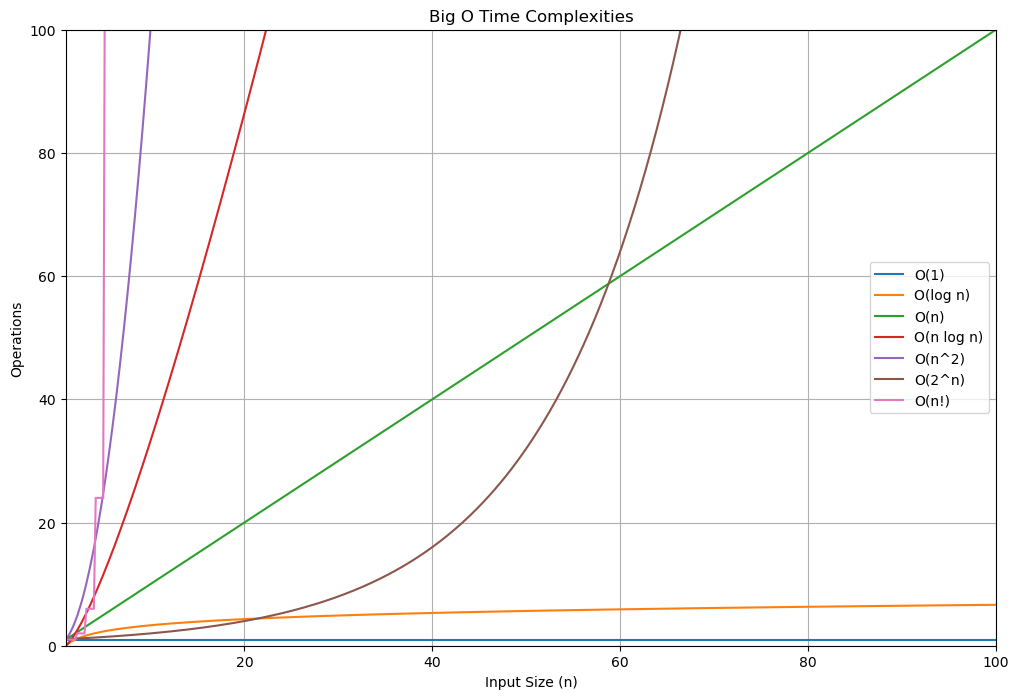

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Define x-axis: input size
x = np.linspace(1, 100, 500)

# Define various Big O functions
y_O1 = np.ones_like(x)
y_Ologn = np.log2(x)
y_On = x
y_Onlogn = x * np.log2(x)
y_On2 = x**2
y_O2n = 2**(x / 10)  # scale x to keep it on the graph
y_Ofactorial = [np.math.factorial(int(val)) if val < 20 else np.nan for val in x]  # avoid overflow

# Plot the complexities
plt.figure(figsize=(12, 8))
plt.plot(x, y_O1, label="O(1)")
plt.plot(x, y_Ologn, label="O(log n)")
plt.plot(x, y_On, label="O(n)")
plt.plot(x, y_Onlogn, label="O(n log n)")
plt.plot(x, y_On2, label="O(n^2)")
plt.plot(x, y_O2n, label="O(2^n)")
plt.plot(x, y_Ofactorial, label="O(n!)")

plt.ylim(0, 100)
plt.xlim(1, 100)
plt.xlabel("Input Size (n)")
plt.ylabel("Operations")
plt.title("Big O Time Complexities")
plt.legend()
plt.grid(True)
plt.show()


### 🧠 What they’re doing:
1. `defaultdict(int)` → Count how many times each number appears across all arrays
```
counts = defaultdict(int)
```

Every time a number shows up in a subarray, they add 1 to that number's count.

2. Loop through all the arrays
```
for arr in nums:
    for x in arr:
        counts[x] += 1
```
So if 3 shows up in all 3 arrays, counts[3] == 3.

### 3. Then they say:
> "Only keep numbers whose count is equal to n (the number of arrays)."
```
n = len(nums)
for key in counts:
    if counts[key] == n:
        ans.append(key)
```
Boom — only the numbers that appeared in every subarray make the final list.

### 4. Return sorted answer:
`return sorted(ans)`

## First they make their dictionary

In [46]:
nums = [[3,1,2,4,5],[1,2,3,4],[3,4,5,6]]
def inter(nums):
        counts = defaultdict(int)
        for arr in nums:
            for x in arr:
                counts[x] += 1
        return counts

inter(nums)

defaultdict(int, {3: 3, 1: 2, 2: 2, 4: 3, 5: 2, 6: 1})

### Here is where some subtle thinking occurs
only numbers that appear n times (i.e., the number of arrays) will be kept- here there are 3 arrays.
#### Thus:
```
        n = len(nums)
        ans = []
        for key in counts:
            if counts[key] == n:
                ans.append(key)

        return sorted(ans)
```


In [48]:
from collections import defaultdict
from typing import List


def intersection(nums):
    # Step 1: Create a default dictionary to count occurrences of each number
    counts = defaultdict(int)

    # Step 2: Loop through each subarray in nums
    for arr in nums:
        for x in arr:
            counts[x] += 1  # Increment the count for this number

    # Step 3: Determine how many subarrays we have
    n = len(nums)

    # Step 4: Initialize a list to hold the final answer
    ans = []

    # Step 5: Loop through the keys in the count map
    for key in counts:
        # If a number appeared in all n subarrays, add it to the result
        if counts[key] == n:
            ans.append(key)

    # Step 6: Return the result in sorted order
    return sorted(ans)

intersection(nums)


[3, 4]

## Example 3: 1941. Check if All Characters Have Equal Number of Occurrences

Given a string `s`, determine if all characters have the same frequency.

**For example**
 `s = "abacbc"`, return `True`.

All characters appear twice.

`s = "aaabb"`, return `False.`

"a" appears 3 times, "b" appears 2 times. 3 != 2.



In [26]:
s = "abacbc"
from collections import defaultdict

def areOccurrencesEqual(s):
    counts = defaultdict(int)
    for c in s:
        counts[c] += 1
    vals = list(counts.values())
    return len(set(vals)) == 1



areOccurrencesEqual(s)




True

### 🔥 What's happening here?
* `counts.values()` → gives you all the counts `[2, 2, 2]`

* `set(vals)` → kills duplicates → `{2}`

* If the set size is 1, **all the counts were the same.**

### 🧠 Why does it work?
* Because a set only keeps unique stuff.

* If everybody was the same number, the set size gonna be 1.

* If not? 🤡 Set gonna have size >1, meaning some counts were different.

#### Superslick

In [7]:
def areOccurrencesEqual(s):
    return len(set(s.count(c) for c in set(s))) == 1

areOccurrencesEqual(s)

False

## Example 4: 560. Subarray Sum Equals K
### Key Thing: if `prefix sum -k` is in the hash map: `ans += 1` that's ther meat of this problem

## 🧠 What's really going on?
You got a list of numbers nums, right?
You're tryna count how many subarrays (chunks of numbers) add up exactly to k.

⚡ First check:
You can't use normal sliding window like you do with "sum ≤ k" problems.
Because when you're hunting for an exact number, adding more numbers usually breaks the sum, not keeps it good.

Sliding window only works when "more is still good," like "sum < k".
Here, more numbers = messier. We need a smarter approach.

## 🧠 560. Subarray Sum Equals K

### 🧩 The smarter idea: Prefix sums with a hashmap

Instead of checking every subarray one by one (slow AF 💀),
we track **prefix sums** — the sum of elements from the start up to a given index.

✋🏽 Hold up tho.
**Why?**
Because the **difference between two prefix sums** gives you the sum of the subarray *between* those two points.

#### 🔍 Example:
Say we got:
```
indexes: 0 1 2 3 4
nums = [0, 1, 2, 3, 4]
prefix = [0, 1, 3, 6, 10] ← cumulative sum from 0 to i
```


## 🔍 Revisited Example for 560. Subarray Sum Equals K (with actual `k` value)

Let's walk through the idea using a **real `k` value** so we lock in the logic.

---

### 💥 Problem Setup:

```python
nums = [0, 1, 2, 3, 4]
k = 5

We want to find how many subarrays sum to 5.

### 🧠 Key Concept:
At each index, we compute the running total (prefix sum).

We ask:

> "Have I seen a prefix sum equal to curr_sum - k before?"

Because:
```
curr_sum - previous_prefix_sum = k
→ subarray between those two points sums to k
```
To track this, we use a hashmap (`prefix_count`) to count how often each prefix sum has occurred.

### 🧮 Step-by-Step Execution:
We initialize:
```
prefix_count = {0: 1}  # prefix sum of 0 has occurred once (important!)
curr_sum = 0
count = 0
```
##### 👉🏽 i = 0, num = 0:
* curr_sum = 0

* `curr_sum - k` = 0 - 5 = -5 → not in prefix_count

* Update: prefix_count = {0: 2}

##### 👉🏽 i = 1, num = 1:
* `curr_sum = 1`

* `1 - 5 = -4` → not in map

* Update: prefix_count = {0: 2, 1: 1}

##### 👉🏽 i = 2, num = 2:
* `curr_sum = 3`

* `3 - 5 = -2` → nope

* Update: prefix_count = {0: 2, 1: 1, 3: 1}

##### 👉🏽 i = 3, num = 3:
* `curr_sum = 6`

* `6 - 5 = 1` ✅ → found in prefix_count

* That means: there is a subarray between a previous index where prefix sum was 1 and now, and it sums to 5 → that subarray is [2, 3]

* So: `count += prefix_count[1]` → count = 1

Update: `prefix_count = {0: 2, 1: 1, 3: 1, 6: 1}`

#### 👉🏽 i = 4, num = 4:
* `curr_sum = 10`

* `10 - 5 = 5` → not in map

* Update: `prefix_count = {0: 2, 1: 1, 3: 1, 6: 1, 10: 1}`




### 💡 Here's the real juice:
We want to find how many subarrays sum to **k**.

Let’s say at index `i`, our `prefix_sum` is `curr_sum`.

If at some earlier index, there was a `prefix_sum` equal to `curr_sum - k`,
then the subarray between those two indices **must sum to k**. 🎯

So we keep a hashmap `prefix_count` to count how many times each prefix sum has shown up.

```
prefix_count = {0: 1}  # We start with 0 sum once (important)
count = 0
curr_sum = 0

for num in nums:
    curr_sum += num
    if curr_sum - k in prefix_count:
        count += prefix_count[curr_sum - k]
    prefix_count[curr_sum] = prefix_count.get(curr_sum, 0) + 1
```

## 🗺️ How the algorithm goes:

1. Walk through the array, adding up numbers into `curr_sum`.

2. At each number, ask:

    > "Yo, have I seen a `prefix_sum` before that would make my chunk sum to exactly `k`?"

    > **Translation: "Is `(curr_sum - k)` already in my counts hashmap?"**

3. If yes, add how many times that `prefix_sum` showed up to your answer.

4. Then record the `curr_sum` you just hit into `counts`.

## 🎯 The key formula:
`curr_sum - k  ➔  did I see this prefix_sum before?`

If yes → it means there’s a subarray ending at me that sums to k.
Maybe many subarrays, so we add up all ways.


In [19]:
from collections import defaultdict
nums = [1, 2, 1, 2, 1]
k=3

def subarraySum(nums, k):
    counts = defaultdict(int)
    counts[0] = 1   # important! empty prefix sum
    curr_sum = 0
    ans = 0

    for num in nums:
        curr_sum += num
        ans += counts[curr_sum - k]  # how many times we've seen the needed prefix
        counts[curr_sum] += 1         # now record my prefix

    return ans, counts

subarraySum(nums, k)

(4, defaultdict(int, {0: 1, -2: 0, 1: 1, 3: 1, 4: 1, 6: 1, 7: 1}))

## Visual Trace: `nums = [1, 2, 3]` and `k = 3`

| Step | `num` | `curr_sum` | `curr_sum - k` | `counts` lookup (how many times seen) | `ans` (running total) | `counts` after update |
|:----:|:-----:|:----------:|:--------------:|:-------------------------------------:|:---------------------:|:---------------------:|
| 1    | 1     | 1          | -2             | 0                                     | 0                     | {0:1, 1:1}             |
| 2    | 2     | 3          | 0              | 1                                     | 1                     | {0:1, 1:1, 3:1}        |
| 3    | 3     | 6          | 3              | 1                                     | 2                     | {0:1, 1:1, 3:1, 6:1}   |

### 🔥 What's Happening
- At step 2:
  - `curr_sum = 3`
  - `curr_sum - k = 0`
  - counts[0] = 1 → there’s **one subarray** ending at index 1 that sums to `k`. ➡️ `ans += 1`
- At step 3:
  - `curr_sum = 6`
  - `curr_sum - k = 3`
  - counts[3] = 1 → **another subarray** ending at index 2 that sums to `k`. ➡️ `ans += 1`
- Final Answer = **2 subarrays**.


### Important Insight:

- If `curr_sum[i] - curr_sum[j] == k`, then the subarray from index `j+1` to `i` sums to exactly `k`.
- Every matching `(curr_sum - k)` means a valid subarray.
- So `ans += counts[curr_sum - k]` is adding the number of ways we can chop the array earlier to get an exact sum of `k`.


## Prefix Sum Timeline for `nums = [1, 2, 1, 2, 1]`

0 --(1)--> 1 --(2)--> 3 --(1)--> 4 --(2)--> 6 --(1)--> 7

- Numbers in parentheses are elements being added.

### How subarrays with sum = 3 are found:

| Current Index (i) | curr_sum[i] | Previous Index (j) | curr_sum[j] | Difference (curr_sum[i] - curr_sum[j]) | Subarray Found (indexes) |
|:-----------------:|:-----------:|:------------------:|:-----------:|:--------------------------------------:|:-------------------------:|
| 1                 | 3           | 0                  | 0           | 3                                      | [0,1] (nums[0:2])          |
| 2                 | 4           | 0                  | 1           | 3                                      | [1,2] (nums[1:3])          |
| 3                 | 6           | 1                  | 3           | 3                                      | [2,3] (nums[2:4])          |
| 4                 | 7           | 2                  | 4           | 3                                      | [3,4] (nums[3:5])          |

### Key Idea:
- Whenever `curr_sum[i] - curr_sum[j] == k`, there is a subarray between j+1 and i that sums to `k`.
- `counts[curr_sum - k]` tracks how many such j's exist at every step.


### How `ans += counts[curr_sum - k]` Works:

- Every time we reach a new number:
    - We calculate `curr_sum - k`.
    - If this value has been seen before (counts[curr_sum - k] > 0):
        - It means there are that many subarrays ending here that sum to `k`.
        - We add all of them to `ans`.

- If counts[curr_sum - k] == 0:
    - No subarrays ending here sum to `k`.
    - No addition to ans.

This check happens **every time**, no matter what.


📊 Example Input:
```
nums = [1, -1, 2, 3]
k = 3
```
### 🧪 Trace Table: nums = [1, -1, 2, 3], k = 3

| Index | num | curr_sum | curr_sum - k | counts lookup | ans | counts updated to                   |
|-------|-----|----------|--------------|---------------|-----|-------------------------------------|
| 0     | 1   | 1        | -2           | 0             | 0   | {0:1, 1:1}                          |
| 1     | -1  | 0        | -3           | 0             | 0   | {0:1, 1:1, 0:1}                     |
| 2     | 2   | 2        | -1           | 0             | 0   | {0:2, 1:1, 2:1}                     |
| 3     | 3   | 5        | 2            | 1 ✅           | 1   | {0:2, 1:1, 2:1, 5:1}                |

### 🧠 What Just Happened?
* At index `3`, `curr_sum = 5`, so we ask: have we seen 5 - 3 = 2 before?

* Yup — we saw `curr_sum = 2` at index 2.

* So the subarray `[3]` alone is NOT the only one — it’s `[2, 3]` (index 2 to 3).

Even though `curr_sum - k = 2` (which is positive here),
look at earlier steps — we were working with negative curr_sum too.

### ❗ Key Insight:
Even if `curr_sum - k < 0`, the code works fine — we just may not have seen that key in the counts yet.

So again:

>Don’t worry about curr_sum - k being negative.
Just check if you’ve seen that prefix sum before.

### 💡 Tattoo This Mental Model:
* Any single number can be its own subarray.
* If that number is exactly k, it counts.

**This is why prefix sum is so powerful — it lets you check for all valid subarrays ending at each index, even if they’re size 1.**

### Key Insight for "Count Number of Nice Subarrays"

- Track how many odd numbers (`curr`) have been seen so far.
- If `nums[i]` is even, `curr` stays the same.
- If `nums[i]` is odd, increment `curr` by 1.
- Every time you hit a new index:
    - Look up `counts[curr - k]`:
        - How many ways were there before to have (curr - k) odds?
        - Each one gives a valid subarray ending at current i.
    - Add that to `ans`.
- Update `counts[curr]` by 1.


In [20]:
from collections import defaultdict
nums = [1, 1, 2, 1, 1]
k = 3

def numberOfSubarrays(nums, k):
    counts = defaultdict(int)
    counts[0] = 1
    ans = curr = 0

    for num in nums:
        curr += num % 2
        ans += counts[curr - k]
        counts[curr] += 1

    return ans

numberOfSubarrays(nums, k)

2

```
nums = [1, 1, 2, 1, 1]
k = 3

```

### 🔁 Step-by-Step Breakdown
Let’s walk through the code, update curr, and match it with what gets stored in counts.

| Index | num | num % 2 | curr (odd count so far) | curr - k | counts[curr - k] | ans | counts after update               |
|-------|-----|---------|--------------------------|-----------|-------------------|-----|----------------------------------|
| 0     | 1   | 1       | 1                        | -2        | 0                 | 0   | {0:1, 1:1}                        |
| 1     | 1   | 1       | 2                        | -1        | 0                 | 0   | {0:1, 1:1, 2:1}                   |
| 2     | 2   | 0       | 2                        | -1        | 0                 | 0   | {0:1, 1:1, 2:2}                   |
| 3     | 1   | 1       | 3                        | 0         | 1                 | 1   | {0:1, 1:1, 2:2, 3:1}              |
| 4     | 1   | 1       | 4                        | 1         | 1                 | 2   | {0:1, 1:1, 2:2, 3:1, 4:1}         |

✅ Final ans = 2
(2 subarrays with exactly 3 odd numbers)

### 🧠 What Does Each Entry in counts Mean?
Let’s decode defaultdict(<class 'int'>, {0: 1, -2: 0, 1: 1, -1: 0, 2: 2, 3: 1, 4: 1}):

| Key | Meaning                                  | Value | Interpretation                                      |
|-----|------------------------------------------|--------|-----------------------------------------------------|
| 0   | 0 odd numbers seen so far                | 1      | Seen once (at start — base case)                   |
| 1   | 1 odd number seen so far                 | 1      | Seen once                                           |
| 2   | 2 odd numbers seen so far                | 2      | Seen twice (indexes 1 and 2)                       |
| 3   | 3 odd numbers seen so far                | 1      | Seen once (at index 3)                             |
| 4   | 4 odd numbers seen so far                | 1      | Seen once (at index 4)                             |
| -1  | Never actually seen, accessed via lookup | 0      | Used for `curr - k` when curr was 2               |
| -2  | Same — never seen                        | 0      | Used for `curr - k` when curr was 1               |

The negative keys just show up because of:
```
ans += counts[curr - k]
```
Even if `curr - k` is negative, the defaultdict handles it gracefully by returning 0.

### 🔍 Real Meaning of the Logic
> "How many previous prefix states had exactly curr - k odd numbers?"
Because that tells us how many subarrays ending right here have exactly k odds.

### ✅ Recap
* `counts[curr]`: how many times we’ve seen a given odd count so far

* `curr - k`: how far back we’d need to rewind the odd count to get a subarray of length k

Final answer: total number of such subarrays

### Why there is no `curr_sum` here:

- In this problem, we are not tracking the total sum of the numbers.
- We are tracking the **count of odd numbers**.
- `curr` counts how many odd numbers have been seen so far.
- Even numbers do not affect `curr`.
- Therefore, no `curr_sum` is needed — just `curr` to track the odd count.


## 🧠 The Line:
`curr += num % 2`

What does this actually do?

* If num is odd (like 1, 3, 5, etc.):

    - num % 2 == 1

    - So curr += 1

* If num is even (like 2, 4, 6, etc.):

    - num % 2 == 0

    - So curr += 0

## 💥 What’s a Constraint Metric?
Let’s strip this down:

> A constraint metric is what you're measuring or limiting in the subarray.

🔍 Think of it like the ruler you’re using to judge if a subarray is valid.

### 🔢 Some Examples of Constraint Metrics

| Problem Type                              | Constraint Metric        | What You’re Tracking                   |
|-------------------------------------------|--------------------------|----------------------------------------|
| Subarray sums to `k`                      | Sum                      | Total sum of subarray                  |
| Subarray with exactly `k` odd numbers     | Count of odd elements    | How many odds in subarray              |
| Longest substring with at most `k` unique chars | Distinct count       | Hashmap of character frequencies       |
| Subarray with max average                 | Sum                      | Sliding window average                 |
| Longest subarray with at most `k` zeros   | Count of zeros           | Flip count for valid subarray          |
| Count of subarrays with product < `k`     | Product                  | Running product within window          |
| Subarrays where all elements are <= `k`   | Max element              | Sliding max or comparison per window   |

#### 🧠 Rule of Thumb:

> Whatever makes the subarray “valid” — that’s your constraint metric.

## 🧠 Why curr - k Shows Up?
Let’s look at the idea behind it. Suppose you’re sweeping a window through an array, and:

* `curr` = cumulative value of your constraint metric up to current index.

* You want to know: how many earlier prefix states could I subtract out to get exactly k?

So:
```
curr - k = some past state
```

**You’re asking:**

> “How many ways did I hit a state in the past where I had exactly k less than I have now?”

This is where the prefix map (a.k.a. counter dictionary) shows up.

## 🔍 Deep Dive: Your Problem
Problem:
```
nums = [1, 1, 2, 1, 1]
k = 3
```

Let’s annotate:

* odds show up at index 0, 1, 3, 4

* you want all subarrays with exactly 3 odd numbers

### 💡 Key Insight:
* Let’s keep `curr` = count of odd numbers so far

* Let’s also keep a dictionary `prefix_counts` to track how often each value of `curr` has appeared

**Why?**
* If `curr = 4` and we’re looking for a subarray ending at index `i` that has 3 odds, then the starting point of that subarray had to have `curr = 1`.

* So how many times did we see `curr = 1` before now? That’s how many valid subarrays end at index i.

## 🔁 Code Walkthrough (Mental Tattoo Time)

In [27]:
from collections import defaultdict

def numberOfSubarrays(nums, k):
    count = 0
    prefix_counts = defaultdict(int)
    prefix_counts[0] = 1   # Base case: 0 odd numbers before we start
    curr = 0               # Running count of odd numbers

    for num in nums:
        if num % 2 == 1:
            curr += 1

        # Look back to how many times we saw (curr - k)
        count += prefix_counts[curr - k]

        # Mark this current prefix state as seen
        prefix_counts[curr] += 1

    return count


### 🧠 Mental Tattoo Summary

| Concept                  | Real Meaning                                                                 |
|--------------------------|------------------------------------------------------------------------------|
| `curr`                   | Running value of your constraint (like count of odd numbers seen so far)     |
| `curr - k`               | The prefix state we must subtract to get exactly `k` constraint units        |
| `prefix_counts[curr - k]`| Number of times we saw that prior valid state → gives number of valid subarrays |
| `prefix_counts[0] = 1`   | Seed the count so subarrays starting at index 0 get counted                   |


### 🧪 Breakdown with Input
```
nums = [1, 1, 2, 1, 1]
k = 3
```

| Index | num | curr (odd count) | curr - k | prefix_counts snapshot           | count |
|-------|-----|------------------|----------|----------------------------------|--------|
| 0     | 1   | 1                | -2       | {0:1, 1:1}                       | 0      |
| 1     | 1   | 2                | -1       | {0:1, 1:1, 2:1}                  | 0      |
| 2     | 2   | 2                | -1       | {0:1, 1:1, 2:2}                  | 0      |
| 3     | 1   | 3                | 0        | {0:1, 1:1, 2:2, 3:1}             | 1      |
| 4     | 1   | 4                | 1        | {0:1, 1:1, 2:2, 3:1, 4:1}        | 2      |

#### ✅ Final Answer: 2 valid subarrays with exactly 3 odd numbers.


## Find Players With Zero or One Losses

You are given an integer array `matches` where `matches[i] = [winneri, loseri]` indicates that the player `winneri` defeated player `loseri` in a match.

Return a list answer of size 2 where:

`answer[0]` is a list of all players that have not lost any matches.
`answer[1]` is a list of all players that have lost exactly one match.
The values in the two lists should be returned in increasing order.

Note:

You should only consider the players that have played at least one match.
The testcases will be generated such that no two matches will have the same outcome.

**Example1**
```
Input: matches = [[1,3],[2,3],[3,6],[5,6],[5,7],[4,5],[4,8],[4,9],[10,4],[10,9]]
Output: [[1,2,10],[4,5,7,8]]
Explanation:
Players 1, 2, and 10 have not lost any matches.
Players 4, 5, 7, and 8 each have lost one match.
Players 3, 6, and 9 each have lost two matches.
Thus, answer[0] = [1,2,10] and answer[1] = [4,5,7,8].
```

**Example 2:**
```
Input: matches = [[2,3],[1,3],[5,4],[6,4]]
Output: [[1,2,5,6],[]]
Explanation:
Players 1, 2, 5, and 6 have not lost any matches.
Players 3 and 4 each have lost two matches.
Thus, answer[0] = [1,2,5,6] and answer[1] = [].
```

In [24]:
matches = [[1,3],[2,3],[3,6],[5,6],[5,7],[4,5],[4,8],[4,9],[10,4],[10,9]]
from collections import defaultdict


from collections import defaultdict

def findWinners(matches):
    # Track how many times each player has lost
    losses = defaultdict(int)

    # Track all players who have played at least one match
    players = set()

    # Process each match: update losses and player set
    for winner, loser in matches:
        losses[loser] += 1           # Increment the loser's loss count
        players.add(winner)          # Add winner to the set of players
        players.add(loser)           # Add loser to the set of players

    # Find all players with 0 losses
    zero_losses = [p for p in players if losses[p] == 0]

    # Find all players with exactly 1 loss
    one_loss = [p for p in players if losses[p] == 1]

    # Return both lists sorted
    return [sorted(zero_losses), sorted(one_loss)]


    return [sorted(zero_losses), sorted(one_loss)]

findWinners(matches)

[[1, 2, 10], [4, 5, 7, 8]]

## 🧠 Problem Breakdown: Find Players With Zero or One Losses

You're given a list of matches in the form `[[winner, loser]]`.

Your goal:
- Return a list of players who have **0 losses**
- Return a list of players who have **exactly 1 loss**

Only include players who actually played (either as winner or loser).

---

### 🔑 What You Need to Track

| Data Structure     | Purpose                                   |
|--------------------|--------------------------------------------|
| `losses[player]`   | How many times each player has lost       |
| `players` (set)    | All players who have played at least once |

---

### 🔁 Step-by-Step Logic

1. Loop through each match `[winner, loser]`
2. Increment `losses[loser]` by 1
3. Add both `winner` and `loser` to the `players` set
4. After processing all matches:
   - Players with `losses[player] == 0` → zero-loss list
   - Players with `losses[player] == 1` → one-loss list
5. Sort both lists and return

---

### 🧱 Example Input

```python
matches = [[2,3],[1,3],[5,4],[6,4]]


### 🧠 Flowchart-style Trace

**Match: [1, 3]**
players → {1, 3}
losses → {3: 1}

**Match: [2, 3]**
players → {1, 2, 3}
losses → {3: 2}

**Match: [3, 6]**
players → {1, 2, 3, 6}
losses → {3: 2, 6: 1}

**Match: [5, 6]**
players → {1, 2, 3, 5, 6}
losses → {3: 2, 6: 2}

**Match: [5, 7]**
players → {1, 2, 3, 5, 6, 7}
losses → {3: 2, 6: 2, 7: 1}

**Match: [4, 5]**
players → {1, 2, 3, 4, 5, 6, 7}
losses → {3: 2, 6: 2, 7: 1, 5: 1}

**Match: [4, 8]**
players → {1, 2, 3, 4, 5, 6, 7, 8}
losses → {3: 2, 6: 2, 7: 1, 5: 1, 8: 1}

**Match: [4, 9]**
players → {1, 2, 3, 4, 5, 6, 7, 8, 9}
losses → {3: 2, 6: 2, 7: 1, 5: 1, 8: 1, 9: 1}

**Match: [10, 4]**
players → {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
losses → {3: 2, 6: 2, 7: 1, 5: 1, 8: 1, 9: 1, 4: 1}

**Match: [10, 9]**
players → {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
losses → {3: 2, 6: 2, 7: 1, 5: 1, 8: 1, 9: 2, 4: 1}


### 💡 Core Data Structures Used

| Structure           | What it Holds                            | Why We Use It                                        |
|---------------------|-------------------------------------------|------------------------------------------------------|
| `defaultdict(int)`  | `{player: loss_count}`                    | Automatically returns 0 for unseen players           |
| `set()`             | `{player1, player2, ...}`                | Stores all unique players who appeared in a match    |
| `list`              | `[players with 0 or 1 losses]`            | Final sorted output as required by the problem       |


## Largest Unique Number

**Example 1**
```
Input: nums = [5,7,3,9,4,9,8,3,1]
Output: 8
Explanation: The maximum integer in the array is 9 but it is repeated. The number 8 occurs only once, so it is the answer.
```
**Example 2**
```
Input: nums = [9,9,8,8]
Output: -1
Explanation: There is no number that occurs only once.
```


In [32]:
nums = [5,7,3,9,4,9,8,3,1]

from collections import defaultdict
ocurrences = defaultdict(int)

for num in nums:
    ocurrences[num] += 1

unique_num = max([num for num in nums if ocurrences[num]==1])
print(unique_num)

8


In [36]:
text = "loonbalxballpoon"

from collections import Counter

key_word = "balloon"


recipe = Counter(key_word)      # what we need → {'l': 2, 'o': 2, 'b': 1, 'a': 1, 'n': 1}
supply = Counter(text)          # what we have → counts of all characters in text

numz = min(supply[char] // recipe[char] for char in recipe)
print(numz)



2


## Contiguous Array
**Example 1:**
```
Input: nums = [0,1]
Output: 2
Explanation: [0, 1] is the longest contiguous subarray with an equal number of 0 and 1.
```

**Example 2:**
```
Input: nums = [0,1,0]
Output: 2
Explanation: [0, 1] (or [1, 0]) is a longest contiguous subarray with equal number of 0 and 1.
```
**Example 3:**
```
Input: nums = [0,1,1,1,1,1,0,0,0]
Output: 6
Explanation: [1,1,1,0,0,0] is the longest contiguous subarray with equal number of 0 and 1.
```

# 🧠 Problem: Contiguous Array (LeetCode 525)

## 🎯 Goal:
Given a binary array `nums` (only 0s and 1s), return the **maximum length** of a contiguous subarray with **equal number of 0s and 1s**.

---

## 🔍 How to Recognize This Pattern

This is a classic **prefix sum + hashmap** problem. Watch for clues:

- Problem talks about **equal count** of two values (like 0s and 1s)
- You need to find the **longest** or **maximum length** of a **subarray**
- You're allowed to scan the array once or optimize a brute force solution

When you see **"longest subarray where counts balance out"**, think:
> Can I turn this into a sum problem?

Yes — by converting `0 → -1`, we’re looking for the **longest subarray that sums to 0**.

---

## 💡 Core Idea (Reframe the Problem)

1. Convert `0`s to `-1`s → this transforms the array so we can use prefix sum logic.
2. Now the problem becomes:
   > Find the **longest subarray** with a sum of **zero**.
3. Track **prefix sums** and store the **first index** where each sum appears.
4. If we see the same sum again, the subarray in between must sum to **0**.

---

## 🧱 Step-by-Step Approach

1. **Initialize**:
```
   running_sum = 0
   index_map = {0: -1}  # Handle edge case where valid subarray starts at index 0
   max_len = 0
```
2. Loop through the array:

* Convert 0 → -1

* Add to running_sum

    * If that running_sum was seen before:

        * The subarray between the first time and now sums to 0

        * Calculate its length: i - index_map[running_sum]

        * Update max_len if this length is longer

    * If it has not been seen before:

        * Store the index of this sum: index_map[running_sum] = i

In [45]:
nums = [1, 0, 0, 1]
# [0, 1, 0, 1, 1, 0]

def findMaxLength(nums):
    running_sum = 0
    index_map = {0: -1} # NOTE: the dict is val:running sum- here we initialize it
    max_len = 0

    for i, num in enumerate(nums):
        val = -1 if num == 0 else 1
        running_sum += val

        if running_sum in index_map:
            length = i - index_map[running_sum]
            max_len = max(max_len, length)
        else:
            index_map[running_sum] = i

    return max_len

print(findMaxLength(nums))

4


## Option 2: Use a *different version* of the function that assumes input is *already transformed*

In [46]:
def findMaxLengthTransformed(nums):
    running_sum = 0
    index_map = {0: -1} # the key here is that the key is the num and the val is the index BUT always initialize like this!
    max_len = 0

    for i, val in enumerate(nums):  # assume already transformed
        running_sum += val

        if running_sum in index_map:
            length = i - index_map[running_sum]
            max_len = max(max_len, length)
        else:
            index_map[running_sum] = i

    return max_len

nums = [1, -1, -1, 1]
print(findMaxLengthTransformed(nums))  # ✅ Outputs: 4


4


## 🔁 The Real Game

Tech screens aren’t just about solving problems — they’re about **pattern recognition**.

Learn to spot the hidden structure beneath the surface. Here are the heavy hitters:

- **Prefix Sum**
  - Clues: "longest", "balanced", "equal count", "sum = 0"
  - Common usage: track state changes over time, convert problems to running totals

- **Hashmap**
  - Clues: "first occurrence", "frequency count", "lookup in constant time"
  - Use it to store what you’ve seen and where

- **Sliding Window**
  - Clues: "maximum/minimum subarray", "contains exactly k", "length ≤ k"
  - Used when you want to maintain a window with a dynamic size or constraint

- **Two Pointers**
  - Clues: "sorted array", "move in from both ends", "in-place operations"
  - Classic for shrinking space without nested loops

- **DFS/BFS**
  - Clues: "tree", "graph", "traverse", "level order", "connected components"
  - Use queues for BFS, stacks/recursion for DFS

---

### 🧠 Pattern Recognition is King

Interviewers rarely hand you the exact LeetCode problem — but they often hand you a **problem that lives in the same neighborhood**.

For example:
> Instead of “equal number of 0s and 1s,” they’ll say “equal number of successes and failures.”

Same pattern, different vocab.

**Learn the patterns. Not just the problems.**


## 💣 Real Talk

⏱ **You’ve got 30–45 minutes per problem**, sometimes less.

🤔 If you're still trying to *figure out the strategy* 10 minutes in, you're in a hole.

🧠 But if you **recognize the underlying pattern**?
You’re halfway done in your head before you write a line of code.

---

## 🧠 Interview Pattern Recognition = Superpower

- Memorizing problems ≠ Mastery
- **Mastering patterns = Speed + Confidence**

That’s why this method works:

- ✅ You stop and ask **why** something works
- ✅ You challenge your own assumptions and fix the gaps
- ✅ You’re building **instincts**, not just copying answers

---

## 🥇 Pro Moves in a Real Interview

### 🔍 Spot the Category Within 60 Seconds

> Ask yourself:
- Is this about prefix sums, sliding windows, or frequency counts?
- Does it involve trees, graphs, or intervals?
- What’s the size of the input? Can brute force work?

📌 *Common categories:*
- Hashmap / Set
- Prefix Sum
- Sliding Window
- Binary Search
- Stack / Monotonic Stack
- DFS / BFS
- Union Find
- Greedy
- DP (Dynamic Programming)

---

### ✍️ Write a High-Level Plan in Comments

```python
# Step 1: Convert 0s to -1s
# Step 2: Track running sum
# Step 3: Use hashmap to store first index of each prefix sum
# Step 4: If prefix sum repeats, compute length and update max


# 💸 Moneyline Betting Odds Calculator with Hashing


In [29]:
# 💸 Moneyline Betting Odds Calculator with Hashing

def calculate_payout(odds_dict, bet_amount):
    results = {}  # Store results in a hashmap

    for team, odds in odds_dict.items():
        if odds > 0:
            profit = bet_amount * (odds / 100)
        else:
            profit = bet_amount / abs(odds) * 100

        total_return = bet_amount + profit

        results[team] = {
            "odds": odds,
            "profit": round(profit, 2),
            "total_return": round(total_return, 2)
        }

    return results


# Example usage:
odds = {
    "Yankees": -144,
    "Mariners": +122
}

bet = 100  # You can change this

payouts = calculate_payout(odds, bet)

# 🖨️ Display the results
for team, info in payouts.items():
    print(f"Team: {team}")
    print(f"  Odds: {info['odds']}")
    print(f"  Profit if you bet ${bet}: ${info['profit']}")
    print(f"  Total return: ${info['total_return']}")
    print()

# ⭐ Determine the favorite
favorite = min(odds, key=lambda t: odds[t] if odds[t] < 0 else float('inf'))
print(f"🔥 Favorite: {favorite} (odds: {odds[favorite]})")


Team: Yankees
  Odds: -144
  Profit if you bet $100: $69.44
  Total return: $169.44

Team: Mariners
  Odds: 122
  Profit if you bet $100: $122.0
  Total return: $222.0

🔥 Favorite: Yankees (odds: -144)


# More hashing examples

### Example 1: 49. Group Anagrams

Given an array of strings strs, group the anagrams together.

For example, given:
`strs = ["eat","tea","tan","ate","nat","bat"], return [["bat"],["nat","tan"],["ate","eat","tea"]]`

> The cleanest way to know if two strings are anagrams of each other is by checking if they are equal after both being sorted. Also, all strings in a group will be the same when sorted, so we can use the sorted version as a key. We can map these keys to the groups themselves in a hash map, and then our answer is just the values of the hash map.

Essentially, every group has its own "identifier" (the sorted string), and we can use this identifier to group them in a hash map easily.

Two strings are anagrams of each other if and only if they are sorted. This makes sense because when you sort a string, the characters are forced to appear in a well defined order. By definition, anagrams have the same letters, so when these letters appear in the same order, they must be equal.

If we have a string "bcab", then sort it, we have "abbc". This is its "identifier" because every anagram of "bcab" will also result in "abbc" when sorted. We can use the identifier of each string as a hash map key to easily group all the anagrams together.





In [8]:
strs = ["eat","tea","tan","ate","nat","bat"] # return [["bat"],["nat","tan"],["ate","eat","tea"]]

from collections import defaultdict

d = defaultdict(list)

for word in strs:
    srtd = ''.join(sorted(word))
    d[srtd].append(word)

res = list(d.values())
print(res)


[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]


### Their solution

In [18]:
strs = ["eat","tea","tan","ate","nat","bat"]
from collections import defaultdict

def groupAnagrams(strs):
    groups = defaultdict(list)
    for s in strs:
        key = "".join(sorted(s))
        groups[key].append(s)

    return list(groups.values())

groupAnagrams(strs)

[['eat', 'tea', 'ate'], ['tan', 'nat'], ['bat']]

### 🔍 What’s Really Happening?
Let’s walk it through like Python sees it:
```
s = "eat"
key = "aet"  # after sorting
groups[key]  # doesn't exist yet? no problem — defaultdict makes it []
groups[key].append("eat")  # now appending to that empty list
```
Boom, `"eat"` is now in `groups["aet"]`

Next time `"tea"` comes in, it gets the same sorted key:
```
key = "aet"
groups["aet"].append("tea")
```
Now `groups["aet"] = ["eat", "tea"]`

### 🧠 Mental Shortcut
> When you use `defaultdict(list)`, you can treat every `groups[key]` like it's already a list — no need to pre-create it or check if it’s there.

So yeah, `append()` is for lists, and `groups[key]` is a list at that moment, because `defaultdict(list)` made it that way.

## 🔧 Without defaultdict (Manual Handling)

In [10]:
def groupAnagrams(strs):
    groups = {}

    for s in strs:
        key = ''.join(sorted(s))

        # Check if the key exists already
        if key not in groups:
            groups[key] = []  # Manually create the list

        groups[key].append(s)

    return list(groups.values())


Total Time = $N * O(K log K) = O(N * K log K)$


## Example 2: 2260. Minimum Consecutive Cards to Pick Up

Given an integer array `cards`, find the length of the *shortest* subarray that contains at least one duplicate. If the array has no duplicates, return `-1`.

We can actually solve this problem using a sliding window, but let's take a look at another approach that has more emphasis on a hash map. This question is equivalent to: <span style="background-color: yellow">what is the shortest distance between any two of the same element?</span> If we go through the array and use a hash map to record the indices for every element, we can iterate over those indices to find the shortest distance. For example, given `cards = [1, 2, 6, 2, 1]`, we would map `1: [0, 4], 2: [1, 3], and 6: [2]`. Then we can iterate over the values and see that the **minimum** difference can be achieved from picking up the 2s.

The shortest subarray that contains a duplicate will have the first and last element be the duplicate - otherwise elements could be trimmed off the edges at no cost. Therefore, we just need to find the shortest distance between any two of the same element.

Iterate over the array once and record the position of each element in a hash map. <span style="background-color: yellow">The keys to the hash map will be the element, and the value will be an array of all the indices it appears at.</span>

Because we iterate on the indices in ascending order, each array within the hash map will also be sorted ascending.

Now we can check each element individually. To find the minimum distance, we just need to check all adjacent pairs because the array is sorted.



So **Key-->element of array: Value-->idx value appears at**

If you have `cards = [1, 2, 6, 2, 1]` --> `{1: 0, 2: 1, 6: 2, 2: 3, 1: 4}`

so if we had a dict called `d`

`d = {1: 0, 2: 1, 6: 2, 2: 3, 1: 4}`

d[1] = 0, d[2] = 1, d[6] = 2, d[2] = 3 so right here we have 2 ocurrences of d[2] at vals [1, 3] how do we turn this into python?

```
d[1] = 0
d[2] = 1
d[6] = 2
d[2] = 3
```
You’re watching `2` get overwritten from `1 → 3`, and you want to catch that the first time `2` appeared at index `1`, and the second time at index `3`, and compute the difference, i.e. `3 - 1`.

### 🧱 Step-by-step: Build That in Python
Let’s simulate that with a loop and a conditional:
```
cards = [1, 2, 6, 2]
d = {}  # map from card value to index
```
Now loop and check:
```
for i, card in enumerate(cards):
    if card in d:
        print(f"Found duplicate for {card} at index {i}")
        diff = i - d[card]
        print(f"Previous index: {d[card]}, Current index: {i}, Difference: {diff}")
    d[card] = i  # update the index for this card
```
so: `diff = i - d[card]`

#### 🧪 Output will be:
```
Found duplicate for 2 at index 3
Previous index: 1, Current index: 3, Difference: 2
```


In [11]:
cards = [1, 2, 6, 2, 1]  # 🟡 Input array of card values (can have duplicates)

from collections import defaultdict  # ✅ Import defaultdict for auto-initialized lists

# 🔧 Function to find the length of the smallest subarray containing a duplicate
def minimumCardPickup(cards):
    dic = defaultdict(list)  # ✅ Dictionary where each key maps to a list of indices (auto-created)

    # 🔁 Loop through each card by index
    for i in range(len(cards)):
        dic[cards[i]].append(i)
        # 🔹 Key: card value (e.g., 2)
        # 🔹 Value: list of indices it appears at (e.g., [1, 3] for value 2)
        # ✅ If the key isn't there yet, defaultdict creates an empty list for you

    ans = float("inf")  # ⏳ Initialize min distance as infinity (so any real distance will be smaller)

    # 🔁 Now loop over each key in the dictionary (each unique card value)
    for key in dic:
        arr = dic[key]  # 🔹 arr is a list of all indices where `key` appears

        # 🔁 Loop through index *pairs* in `arr`
        for i in range(len(arr) - 1):
            # ✅ We use `-1` because we access `arr[i + 1]` inside the loop
            # 🧠 So we stop at the second-to-last index to avoid IndexError

            # 🧮 Calculate subarray length that contains this duplicate pair
            ans = min(ans, arr[i + 1] - arr[i] + 1)
            # 🔹 `arr[i + 1] - arr[i]` gives the gap between duplicates
            # 🔹 `+1` makes it the **inclusive length** of the subarray

    # ✅ If we found a duplicate (ans was updated), return it. Otherwise, return -1
    return ans if ans < float("inf") else -1



print(minimumCardPickup(cards))

3


Aight, let’s crack this open with no fluff — you already understand the core logic (`diff = i - d[card]`), now let’s break down this line you might be asking about:

`ans = min(ans, arr[i + 1] - arr[i] + 1)
`
### 🧠 First, What Is *arr*?
In that original code:
```
for key in dic:
    arr = dic[key]  # this is the list of all indices where that card appears
```
So for example, if cards = [1, 2, 6, 2, 1], then:
```
dic = {
    1: [0, 4],
    2: [1, 3],
    6: [2]
}
```
So for `key = 2`, `arr = [1, 3]`
That means: "Card `2` shows up at index `1` and again at index `3`"

### 🔎 Now the Line:
```
ans = min(ans, arr[i + 1] - arr[i] + 1)
```
This is just:
`distance_between_repeats = arr[i+1] - arr[i] + 1
`
* Why arr[i+1] - arr[i]?
    - You're getting the gap between two appearances of the same card

* Why the +1?
    - Because they want the length of the subarray that includes both duplicates.

So:

If the same card appears at indices `1` and `3`, that’s the subarray: `cards[1:4]` = `[2, 6, 2]`

That’s a length of `3 - 1 + 1 = 3`

### 🧪 Tiny Example:
```
arr = [1, 3]
arr[1] - arr[0] + 1 = 3 - 1 + 1 = 3
```
That’s the length of the smallest subarray that contains both copies of that card.

### Another potential trip-up: 🔍 Why range(len(arr) - 1) instead of range(len(arr))?
Because you're accessing arr[i + 1] in this line:
`ans = min(ans, arr[i + 1] - arr[i] + 1)
`
### 🔥 Now imagine if you used this:
```
for i in range(len(arr)):
    ans = min(ans, arr[i + 1] - arr[i] + 1)  # Uh oh!
```
When i gets to the last index, you're gonna hit:
`arr[len(arr)]  # ❌ IndexError: list index out of range
`
### Because Python lists are 0-indexed:

* `range(len(arr))` goes from `0` to `len(arr) - 1`

* So `arr[i + 1]` becomes `arr[len(arr)]` at the end — that's out of bounds

### ✅ So `range(len(arr) - 1)` is the safe move
You only loop up to the second-to-last index, so that i + 1 stays inside the list.

## 🔁 TL;DR Rule:
If you're doing `arr[i + 1]` *inside a loop*, you better **stop your loop** at `range(len(arr) - 1)`, or you'll crash out with an `IndexError`.


You might be asking:

> "Why do we start with ans = float("inf") if we're just gonna call min(ans, ...) anyway?"

### 🔍 Here's Why:
`ans = float("inf")` is a safe starting value for tracking the minimum.
You're using:
`ans = min(ans, some_number)`
So you need ans to **start off as something huge**, so that the first real number you compare it with becomes the new minimum.

#### 🧪 Think of This Example:
Let’s say your actual subarray lengths are like: `5, 3, 4`

If you start with:
`ans = 0`
Then:
`ans = min(0, 5)  # still 0 ❌ wrong!`
That’s a problem — your code now thinks 0 is the minimum, but that’s not even a valid subarray length!

#### ✅ So We Start With Infinity
`ans = float("inf")`
Then when we run:
```
ans = min(float("inf"), 5)  # ✅ ans becomes 5
ans = min(5, 3)             # ✅ ans becomes 3
ans = min(3, 4)             # ✅ stays 3
```
### 🧠 Final Word:
* float("inf") is just a clean Python trick for:

> “Start big, so the first real value beats it.”

* It’s like a mental placeholder that says:

> "I haven't seen anything useful yet."




## 🧠 Lesson: Track Previous Occurrences to Find Minimal Distance Between Duplicates
When you're trying to detect patterns like duplicates, repeated values, or distances between repeating elements, you don't need to store everything —
→ You just need to remember where you last saw it.

### 📌 Core Takeaways:
1. Use a hash map (dictionary) to track the last seen index of each element.

    - d[card] = i lets you quickly look up the last time a card showed up.

2. When you see the same value again, compare current index to last seen.

    - `diff = i - d[card]` gives you the gap.

    - Add +1 if they want inclusive length of a subarray.

3. Use `float("inf")` as a clean min-tracker starting value.

    - It guarantees your first real diff will get accepted.

4. Loop carefully if you’re comparing i and i+1.

    - `range(len(arr) - 1)` prevents index out-of-range errors.

## 🧠 Bigger Pattern:
This falls under the "sliding window / last seen / two-pointer" umbrella —
You don’t need to store all data — just the right piece of info from the last step to get your answer in $O(N)$.

#### 🧱 Mental Model Moving Forward:
> “If I’m checking distance between duplicates, I only need to know when I saw it last.”

Want a one-liner motto to keep in your head for these?

> “Don’t hoard the history — remember the last time.”


## Improved version of this algorithm
The time complexity is still
$O(n)$ even though we have a nested loop in the algorithm. This is because the inner loop in the nested loop can only iterate
$n$ times in total, since it's iterating over indices of elements from the array, where
$n$ is the length of the input array.

We can actually improve this algorithm slightly by **observing that we don't need to store all the indices**, <u>but only the most recent one</u> that we saw for each number. This improves the average space complexity. The current algorithm has
$O(n)$ space complexity always, but with the improvement, it is only
$O(n)$ in the worst case, when there are no duplicates.

In [12]:
cards = [1, 2, 3, 4, 1, 1]
from collections import defaultdict


def minimumCardPickup(cards):
    dic = defaultdict(int)
    ans = float("inf")
    for i in range(len(cards)):
        if cards[i] in dic:
            ans = min(ans, i - dic[cards[i]] + 1)

        dic[cards[i]] = i

    return ans if ans < float("inf") else -1

minimumCardPickup(cards)


2

## Example 3: 2342. Max Sum of a Pair With Equal Sum of Digits

Given an array of integers nums, find the maximum value of `nums[i] + nums[j]`, where `nums[i]` and `nums[j]` have the same digit sum (the sum of their individual digits). Return `-1` if there is no pair of numbers with the same digit sum.

**Example 1:**
```
Input: nums = [18,43,36,13,7]
Output: 54
Explanation: The pairs (i, j) that satisfy the conditions are:
- (0, 2), both numbers have a sum of digits equal to 9, and their sum is 18 + 36 = 54.
- (1, 4), both numbers have a sum of digits equal to 7, and their sum is 43 + 7 = 50.
So the maximum sum that we can obtain is 54.
```
**Example 2:**
```
Input: nums = [10,12,19,14]
Output: -1
Explanation: There are no two numbers that satisfy the conditions, so we return -1.
```

### The first thing you may ask yourself- How do I even add these numbers???

It will go something like this:
```
sum = 0
while x:
     sum += x%10
     x = x//10
```
Just think about it:
- 18 % 10 = 8
- 18 // 10 = 1

then you add these digits to get 9



In [27]:
num = 18
print(f'18 % 10 = {18 % 10}')
print(f'18 // 10 = {18 // 10}')
print(f'1 // 10 = {1 // 10}')

# encase in a for loop
sum = 0
while num > 0:
    sum += num % 10
    num = num //10
print(sum)


18 % 10 = 8
18 // 10 = 1
1 // 10 = 0
9


In [5]:
nums = [18, 43, 36, 13, 7]

for num in nums:
    digit_sum = 0
    n = num
    while n > 0:
        digit_sum += n % 10
        n = n // 10
    print(f"Number: {num}, Digit Sum: {digit_sum}")



Number: 18, Digit Sum: 9
Number: 43, Digit Sum: 7
Number: 36, Digit Sum: 9
Number: 13, Digit Sum: 4
Number: 7, Digit Sum: 7


### Let's just look at this part

In [8]:
n= 18
digit_sum = 0
digit_sum += n% 10
print(digit_sum)

8


**so here you just get the last digit**

### 🧠 Step-by-Step Breakdown
🎯 Goal:
We wanna find the sum of digits for each number in the list nums.

#### 🔢 Step 1: Loop through the numbers
`for num in nums:`

You're pulling each number from the list. First it’s 18, then 43, etc.

#### 🛑 Step 2: Don’t Touch the Original
`n = num`
We copy the number into `n` so we can chop it up without losing the original. Think of `num` like the name on the birth certificate and `n` is the street nickname we mess with.

#### 🏁 Step 3: Initialize your sum
`digit_sum = 0`
You're setting up a counter to collect the digits.

#### ♻️ Step 4: Loop through the digits
`while n > 0:`
You loop **until the number becomes 0**. This is your digit extraction zone.

#### 🧮 Step 5: Extract last digit and add it
`digit_sum += n % 10`

**This is the sauce**. `n % 10` gives you the last digit:

* `18 % 10 → 8`

* `43 % 10 → 3`

You’re adding that to `digit_sum`.



### 💥 Quick Trace Example: num = 36
* `n = 36`, `digit_sum = 0`

* `36 % 10` = `6` → `digit_sum = 6`

* `36 // 10 = 3 → n = 3`

* `3 % 10 = 3 → digit_sum = 9`

* `3 // 10 = 0 → n = 0, exit loop`

Result: `36` → `digit sum = 9`

In [1]:
nums = [18, 43, 36, 13, 7]

for num in  nums:
    n = num
    digit_sum = 0
    while n > 0:
        digit_sum += n % 10
        n = n // 10
    print(digit_sum)


9
7
9
4
7


### OK, so we have got the digit sums
**Here are the instructions**
> Given an array of integers nums, find the maximum value of `nums[i] + nums[j]`, where `nums[i]` and `nums[j]` have the same digit sum (the sum of their individual digits). Return `-1` if there is no pair of numbers with the same digit sum.

#### 🧠 So What's the Strategy?
right here:

> "Make a dictionary where the key is the digit sum, and the value is a list of numbers that gave that digit sum."

so k: digit sum, v: list of numbers--> dict= {digit_sum: num, digit_sum: num......}

#### 🔍 Now, About defaultdict(list)...
That’s a Python trick that saves your ass when building dictionaries of lists.

**✋ Without it:**
```
d = {}
for x in nums:
    key = some_key(x)
    if key not in d:
        d[key] = []
    d[key].append(x)
```

***✅ With `defaultdict(list)`:***
```
from collections import defaultdict

d = defaultdict(list)

for x in nums:
    key = some_key(x)
    d[key].append(x)  # No need to check if key exists. It auto-creates it as a list!
```

#### ⚙️ Under the Hood:
`defaultdict(list)` means:
> “If I access a key that doesn’t exist, just give me an empty list and let me roll.”

You can also do `defaultdict(int)` for counting, or `defaultdict(set)` for unique values.




In [6]:
from collections import defaultdict

grouped = defaultdict(list)

nums = [18, 43, 36, 13, 7]

def digit_sum(n):
    s = 0
    while n > 0:
        s += n % 10
        n //= 10
    return s

for num in nums:
    dsum = digit_sum(num)
    grouped[dsum].append(num)

print(grouped)


defaultdict(<class 'list'>, {9: [18, 36], 7: [43, 7], 4: [13]})


## Next Move:
Now, for each key, if len(grouped[key]) >= 2, sort the list descending and take the top 2. That sum is your candidate for max.

In [18]:
from collections import defaultdict

grouped = defaultdict(list)

nums = [18, 43, 36, 13, 7]

def digit_sum(n):
    s = 0
    while n > 0:
        s += n % 10
        n //= 10
    return s

# Group numbers by their digit sum
for num in nums:
    dsum = digit_sum(num)
    grouped[dsum].append(num)

# Now, find the max pair sum
max_pair_sum = -1  # Start low in case there's no valid pair and note the problem only has positive numbers

for digit, num_list in grouped.items():
    if len(num_list) >= 2:
        sorted_nums = sorted(num_list, reverse=True)
        pair_sum = sorted_nums[0] + sorted_nums[1]
        max_pair_sum = max(max_pair_sum, pair_sum)

print(max_pair_sum)







54


## 2nd Strategy

#### 🧠 Strategy in Plain English
Instead of storing all numbers per digit sum, they only keep the largest number seen so far for each digit sum.

Then:

* When a new number shows up with the same `digit sum`,

* They add it to the previous biggest number in `dic[digit_sum]`,

* And check if that’s the best pair seen.

In [21]:
from collections import defaultdict

def maximumSum(nums):
    def get_digit_sum(num):
        digit_sum = 0
        while num:
            digit_sum += num % 10
            num //= 10

        return digit_sum

    dic = defaultdict(int)
    ans = -1
    for num in nums:
        digit_sum = get_digit_sum(num)
        if digit_sum in dic:
            ans = max(ans, num + dic[digit_sum])
        dic[digit_sum] = max(dic[digit_sum], num)

    return ans

maximumSum(nums)

54

### 🧩 Let’s Annotate the Code
```
from collections import defaultdict

def maximumSum(nums):
    def get_digit_sum(num):
        digit_sum = 0
        while num:
            digit_sum += num % 10
            num //= 10
        return digit_sum
```
### 👇 `get_digit_sum()`:
* Just like your version — clean digit extraction.

* They use while num: instead of `while num > 0`: — same effect.

```
    dic = defaultdict(int)
    ans = -1
```
* `dic[digit_sum]` holds the largest number seen so far with that digit sum.

* `ans` tracks the best sum of any two such numbers.

```
    for num in nums:
        digit_sum = get_digit_sum(num)
```
Loop through the list, get digit sum for each number.

```
        if digit_sum in dic:
            ans = max(ans, num + dic[digit_sum])
```
#### 💥 Here's the clutch move:

* If there's already a number with the same digit sum,

* Add num + previous max, and update ans if it’s better.

`        dic[digit_sum] = max(dic[digit_sum], num)`

* Keep the largest number seen for that digit sum.

* No need to keep a list. Just the GOAT number per group.

### 🧠 Why This Is Efficient:
* You don’t store extra data.

* You loop through nums once — total time: O(n * d), where d is number of digits.

* You keep a tight dict — no sorting, no second loop. Clean.





## 🔧 Optimized Version – Written Like You Own It:

In [20]:
from collections import defaultdict

nums = [18, 43, 36, 13, 7]

def digit_sum(n):
    s = 0
    while n > 0:
        s += n % 10
        n //= 10
    return s

best = defaultdict(int)
max_sum = -1

for num in nums:
    dsum = digit_sum(num)
    if dsum in best:
        max_sum = max(max_sum, num + best[dsum])
    best[dsum] = max(best[dsum], num)

print(max_sum)



54


* `defaultdict(int)` gives you a default of 0

* This lets you skip key checks and write slick, one-liner logic

* In this problem, we used it to track the max number per digit sum and avoid crashes

### 🔁 Code Walkthrough Example (Leetcode 2342)

Let’s say `nums = [18, 43, 36, 13, 7]`

| `num` | `digit_sum` | `best[dsum]` before | Action Taken                                              | `max_sum` |
|-------|-------------|---------------------|-----------------------------------------------------------|-----------|
| 18    | 9           | 0                   | `best[9] = max(0, 18)` → 18                               | -1        |
| 43    | 7           | 0                   | `best[7] = max(0, 43)` → 43                               | -1        |
| 36    | 9           | 18                  | `max_sum = max(-1, 36 + 18)` → **54**                     | 54        |
|       |             |                     | `best[9] = max(18, 36)` → 36                              |           |
| 13    | 4           | 0                   | `best[4] = max(0, 13)` → 13                               | 54        |
| 7     | 7           | 43                  | `max_sum = max(54, 7 + 43)` → stays **54**               | 54        |
|       |             |                     | `best[7] = max(43, 7)` → stays 43                         |           |


### 🧠 `defaultdict` Flashcard Cheat Sheet

#### 🔧 General Syntax:
```python
from collections import defaultdict
```
d = defaultdict(default_factory)

### 🧮 defaultdict(int)
* Default value: 0

* Use when: You’re counting things

* Example: Character frequency, tallying votes, counting digits
```
count = defaultdict(int)
for ch in "banana":
    count[ch] += 1
{'b':1, 'a':3, 'n':2}
```

### 📦 defaultdict(list)
* Default value: [] (empty list)

* Use when: You want to group values under the same key

* Example: Grouping items by category, building adjacency lists for graphs
```
groups = defaultdict(list)
for word in ["bat", "tab", "cat"]:
    key = ''.join(sorted(word))
    groups[key].append(word)
{'abt': ['bat', 'tab'], 'act': ['cat']}
```

### 🔒 defaultdict(set)
* Default value: set() (empty set)

* Use when: You want to store unique values per key

* Example: Avoid duplicates in grouping, graph representations
```
graph = defaultdict(set)
graph[1].add(2)
graph[1].add(2)  # only one 2 is stored
```

### 💣 defaultdict(lambda: <custom_value>)
* Default value: Custom! Whatever you want.

* Use when: You need a specific default other than 0, [], or set()
```
from collections import defaultdict
d = defaultdict(lambda: 999)
print(d['missing']) --> 999
```


## Example 4: 2352. Equal Row and Column Pairs

Given an `n x n` matrix grid, return the number of pairs `(R, C)` where `R` is a row and `C` is a column, and `R` and `C` are equal if we consider them as 1D arrays.

**How can we calculate the number of equal pairs?** Let's say there are three rows that look like `[1, 2, 3]`, and there are two columns that also look like `[1, 2, 3]`. For each of the three rows, there are two columns to pair with, so that means there are `3 * 2 = 6` pairs. We can use a hash map to count how many times each **row** occurs. We can use a *second hash map* to do the same thing with the columns. Then, we can iterate over the rows hash map, and for each row, check if the same array appeared as a column. If it did, then the product of the number of appearances is added to our answer.

The problem is, **arrays can't be put in a hash map as a key because they are mutable**. We need to convert the rows and columns into a hashable form such as a string or tuple. The best choice will depend on the language you're using.

If there are `x` rows that are identical to `y` columns, then for each of the `x` rows, it could match with any of the `y` columns. This means there are `x * y` pairs.

By using **separate hash maps** for the **rows** and **columns**, we can easily find, for any given row/column, how many times it shows up as a row and as a column. *Then we just take their product and add it to the answer.*

The only issue now is converting the rows/columns into a *hashable format, as we cannot hash arrays. In Python, we can easily convert them into tuples. In other languages, we convert them into strings delimited by a comma.



## Wrong way to go about this

In [36]:
grid = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]
from collections import defaultdict
rows = defaultdict(list)
for row in grid:
    row.append(rows)
print(rows)

defaultdict(<class 'list'>, {})


### 🔄 Rows and Columns — Real Talk
Let’s say you got this grid:

In [37]:
grid = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]


### ✅ Iterating Over Rows
Easy. Each row is already a list inside the big list:

In [38]:
for row in grid:
    print(row)


[1, 2, 3]
[4, 5, 6]
[7, 8, 9]


Or if you need index too:

In [39]:
for i in range(len(grid)):
    print(f"Row {i}:", grid[i])


Row 0: [1, 2, 3]
Row 1: [4, 5, 6]
Row 2: [7, 8, 9]


### ✅ Iterating Over Columns
Now here’s where rookies fumble the bag — columns aren’t directly stored like rows, so you **gotta construct them**:

In [40]:
n = len(grid)

for col in range(n):
    col_vals = [grid[row][col] for row in range(n)]
    print(f"Col {col}:", col_vals)


Col 0: [1, 4, 7]
Col 1: [2, 5, 8]
Col 2: [3, 6, 9]


### 🔍 What’s happening here?
You're looping over the column `index (col)` and for each col, you're grabbing the element at `grid[row][col]` across all rows.

Think of it like:

* Fix column index

* Slide down the rows to build that column

## 💥 Pro Move: Transposing with Zip
Want all columns in one shot?

In [41]:
columns = list(zip(*grid))
for col in columns:
    print(col)


(1, 4, 7)
(2, 5, 8)
(3, 6, 9)


This uses unpacking `*grid` and `zip()` to flip rows into columns. Super clean.

### Code Nuggets

In [44]:
# Iterate rows
for row in grid:
    pass  # do something with row

# Iterate columns
for col_idx in range(len(grid[0])):
    col = [grid[row_idx][col_idx] for row_idx in range(len(grid))]
    pass  # do something with col

# Pro move: transpose to get columns
columns = list(zip(*grid))  # Now columns[i] gives you the i-th column as a tuple
print(columns)


[(1, 4, 7), (2, 5, 8), (3, 6, 9)]


#### 🛠️ So in the mistake above, what I probably should have done:
You wanna store the row (as a tuple) inside the rows dictionary, probably counting how many times each row appears — right?

✅ Fixed version:

In [48]:
from collections import defaultdict

rows = defaultdict(int)
cols = defaultdict(int)

for row in grid:
    rows[tuple(row)] += 1

transposed = list(zip(*grid)) # there's no trick to it, it's just a simple trick
for col in transposed:
    cols[tuple(col)] += 1

print(f'rows: {rows}')
print(f'cols: {cols}')

if rows in cols:
    res = rows[row] * cols[col]


rows: defaultdict(<class 'int'>, {(1, 2, 3): 1, (4, 5, 6): 1, (7, 8, 9): 1})
cols: defaultdict(<class 'int'>, {(1, 4, 7): 1, (2, 5, 8): 1, (3, 6, 9): 1})


TypeError: unhashable type: 'collections.defaultdict'

## This is the wrong way of checking for membership

### 🔥 The Problem
I wrote:
```
if rows in cols:
    res = rows[row] * cols[col]
```
### ❌ What went wrong?
* `rows` is a defaultdict

* `cols` is also a defaultdict

So rows in cols is like saying:
> "Is this entire dictionary rows one of the keys in cols?"
**That doesn’t make sense in Python — it's like asking:**

> “Is the whole phonebook inside someone’s phone number?”

You wanna compare the `keys` of `rows` to the `keys` of `cols`.

*So here’s how to properly do it:*

In [49]:
res = 0

for key in rows:
    if key in cols:
        res += rows[key] * cols[key]


Boom. That’s the magic. You're saying:

> “For every row-tuple that showed up, check if it’s also a column-tuple — and if it is, multiply how many times it appears as a row by how many times it appears as a column.”

### So here's what we come up with:

In [51]:
from collections import defaultdict

grid = [
    [1, 2, 1],
    [4, 5, 2],
    [1, 2, 1]
]

rows = defaultdict(int)
cols = defaultdict(int)

for row in grid:
    rows[tuple(row)] += 1

transposed = list(zip(*grid))
for col in transposed:
    cols[tuple(col)] += 1

res = 0
for key in rows:
    if key in cols:
        res += rows[key] * cols[key]

print("Matching row-column pairs:", res)


Matching row-column pairs: 2


## 🧠 Lesson Summary: Matching Rows and Columns in a Grid

| Concept               | Correct Approach                              |
|-----------------------|-----------------------------------------------|
| Check if a row is a column | Compare keys: `if key in cols:`            |
| Avoid comparing entire dicts | `rows in cols` is invalid — don’t compare dicts |
| Use hashable keys     | Convert rows/columns to `tuple` before hashing |
| Multiply matches      | `res += rows[key] * cols[key]` accumulates matching pairs |
| Variable scope matters | Make sure `key`, `row`, `col` are scoped right |

**Pro Tip:** When you're comparing rows and columns in a grid, you're really comparing **tuples**, not lists — and you're checking if a specific pattern appears in both the row map and the column map.



## 🔄 Tuples vs Sets in Python

When working with matrices, it's important to know when to use a `tuple` vs a `set`. Here's a breakdown:

| Feature              | `tuple`                            | `set`                              |
|----------------------|-------------------------------------|------------------------------------|
| **Ordered?**         | ✅ Yes (preserves order)            | ❌ No (unordered)                   |
| **Allows duplicates?** | ✅ Yes                             | ❌ No (only unique values)          |
| **Hashable?**        | ✅ Yes (can be used as dict keys)   | ✅ Yes (as long as elements are hashable) |
| **Mutable?**         | ❌ No (immutable)                   | ✅ Yes (mutable)                    |
| **Best for...**      | Exact sequence matching (e.g. rows/cols) | Checking for unique items regardless of order |

### 🔥 Examples

```python
# Tuple preserves order and duplicates
tuple_example = (1, 2, 2)
print(tuple_example)  # (1, 2, 2)

# Set removes duplicates and ignores order
set_example = {1, 2, 2}
print(set_example)    # {1, 2}


## My final code

In [54]:
from collections import defaultdict
from typing import List

grid = [
    [1, 2, 1],
    [4, 5, 2],
    [1, 2, 1]
]


def equalPairs(grid):
    row_counts = defaultdict(int)

    # Count each row as a tuple
    for row in grid:
        row_counts[tuple(row)] += 1

    # Transpose grid and count each column as a tuple
    col_counts = defaultdict(int)
    for col in zip(*grid):  # zip(*grid) transposes the grid
        col_counts[col] += 1

    # Count matching (row, column) pairs
    result = 0
    for key in row_counts:
        if key in col_counts:
            result += row_counts[key] * col_counts[key]

    return result

equalPairs(grid)


2

$O(n^2)$ + $O(n^2)$ + $O(n)$ → simplified to → **$O(n^2)$**

So yeah, it's clean and efficient — just quadratic time, which is **expected for any grid-based solution that touches every element.**
